In [1]:
import json


In [4]:
root = "../work_dirs/sample_statistics.json"
with open(root, 'r') as f:
    content = json.load(f)
content.keys()

dict_keys(['Batch_size', 'Total_sample', 'Noimg', 'Shapeless2', 'data'])

In [5]:
size_data = content['data']
size_data

{'0': {'81,85': 3,
  '49,21': 1,
  '36,40': 18,
  '37,50': 26,
  '36,45': 44,
  '35,47': 29,
  '38,44': 24,
  '34,43': 48,
  '30,45': 17,
  '32,45': 44,
  '211,394': 1,
  '301,445': 1,
  '199,288': 1,
  '35,40': 29,
  '22,30': 98,
  '15,20': 293,
  '10,14': 632,
  '14,17': 414,
  '55,73': 8,
  '20,22': 141,
  '19,22': 155,
  '13,15': 357,
  '17,21': 233,
  '18,21': 211,
  '19,20': 75,
  '18,20': 189,
  '22,20': 21,
  '17,19': 163,
  '18,19': 96,
  '15,17': 248,
  '11,12': 493,
  '13,12': 68,
  '27,28': 27,
  '24,25': 32,
  '14,18': 412,
  '17,27': 47,
  '18,28': 56,
  '14,21': 180,
  '12,16': 439,
  '14,23': 55,
  '33,38': 52,
  '34,52': 10,
  '22,28': 132,
  '22,25': 132,
  '25,27': 71,
  '22,26': 134,
  '30,33': 57,
  '391,640': 1,
  '26,31': 85,
  '23,27': 96,
  '24,24': 33,
  '23,30': 101,
  '23,28': 131,
  '23,29': 110,
  '22,27': 136,
  '24,31': 83,
  '29,33': 57,
  '28,35': 57,
  '31,36': 51,
  '52,68': 12,
  '54,71': 10,
  '43,41': 6,
  '49,71': 6,
  '41,63': 8,
  '33,41': 46,


In [26]:
x = []
y = []
z = []
bbox = []
for k, v in size_data.items():
    for per_k, per_v in v.items():
        wh = per_k.split(',')
        w, h = int(wh[0]), int(wh[1])        
        x.append(w)
        y.append(h)
        z.append(per_v)
        bbox.append({'w': w, 'h': h, 'num': per_v})
max(x), max(y)

(640, 640)

In [15]:
bbox.sort(key=lambda x: x.get('num'), reverse=True)
# print(bbox)

In [36]:
cat = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 100, 150, 200]
cat2 = [_ ** 2 for _ in cat]
catname = [f'<{cat[0]}']
for i in range(1, len(cat)):
    catname.append(f"{cat[i - 1]}~{cat[i]}")
catname.append(f'>{cat[-1]}')
cat_dict = {}
for n in catname:
    cat_dict[n] = 0
for b in bbox:
    area = b['w'] * b['h']
    for i in range(len(cat2)):
        if area < cat2[i]:
            cat_dict[catname[i]] += b['num']
            break
    else:
        # print(b, area, cat2[i], i, catname[i])
        cat_dict[catname[-1]] += b['num']

In [37]:
cat_dict

{'<5': 38358,
 '5~10': 53854,
 '10~15': 32366,
 '15~20': 19925,
 '20~25': 13861,
 '25~30': 9932,
 '30~35': 7524,
 '35~40': 5780,
 '40~50': 8433,
 '50~60': 5528,
 '60~70': 3897,
 '70~80': 2747,
 '80~100': 3857,
 '100~150': 4830,
 '150~200': 2439,
 '>200': 4191}

640

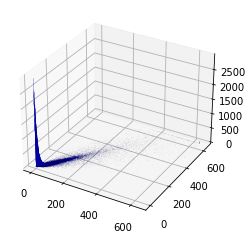

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# xpos = np.array(x)
# ypos = np.array(y)
# zpos = np.zeros_like(xpos)

# # Construct arrays with the dimensions for the 16 bars.
# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = np.array(z)

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# plt.show()

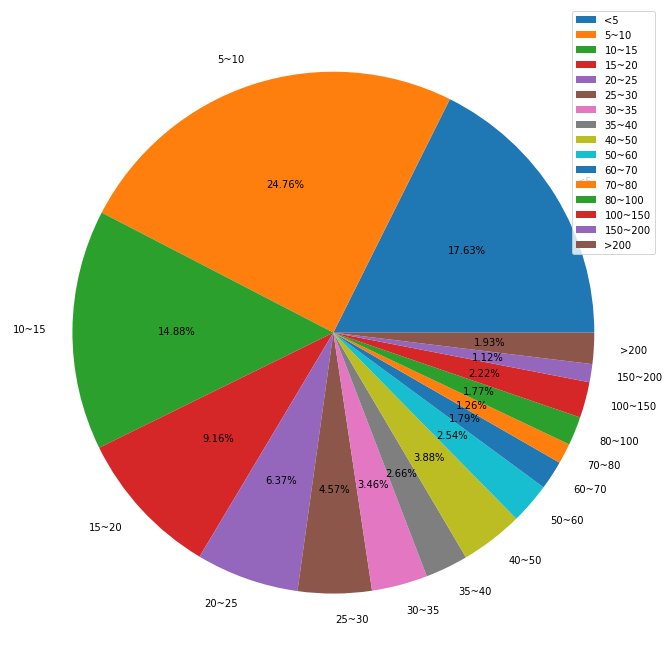

In [42]:
labels, vals = [], []
for k, v in cat_dict.items():
    labels.append(k)
    vals.append(v)
plt.figure(figsize=(12, 12))
plt.pie(vals,
        labels=labels,
        autopct='%.2f%%')
plt.legend()
plt.show()